## Lifestyle and Mental Health ML Project - Nico Gamboa 07/12/2025

**Introduction**

This entry-level machine learning project combines data management and basic machine learning with the growing focus on mental health. 3 machine learning models use lifestyle factors to predict mental health outcomes based on a given dataset. The goal of this project is to analyze the potential causal relationship of lifestyle factors on mental health, while practicing basic machine learning techniques.

**Dataset Overview**

The dataset used for this project was obtained as an open-access CSV from Kaggle user Atharva Soundankar and is called "Mental Health and Lifestyle Habits (2019-2024)." It contains 3000 samples over 5 years detailing lifestyle factors and mental health conditions. Lifestyle factors including diet, exercise, stress, work hours, social interaction, sleep, and screen time were used as features and the binary presence of a mental health condition the target variable.

**Data Reprocessing**

The dataset was already clean and consistent, requiring minimal cleaning. Issues with the datatypes of the loaded columns did require processing, however. Mental health conditions had to be converted from floats and NaN to bianry yes/no values. Categorical columns like "Exercise Level" had to be converted from low/moderate/high to numerical values as well.

**Modeling**

The data was first fed into a logistic regression model and analyzed for accuracy. A RandomForest model was then used to obtain more accurate predictions, with some success. Finally, an XGBoost model was tested, but did not perform as well as the RandomForest model. Finally, the two more advanced models were tuned for estimators, depth, and learning time to maximize accuracy.

### Dataset Preparation

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('Mental_Health_Lifestyle_Dataset.csv')

# Visualize some rows
df.head()


,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4


In [88]:
# Read in as str
df['Mental Health Condition'] = df['Mental Health Condition'].astype(str)

# Defines binary label: 0 if it's 'nan' or 'none', 1 otherwise
df['has_condition'] = df['Mental Health Condition'].apply(
    lambda x: 0 if pd.isna(x) or x.strip().lower() == 'none' or x.strip().lower() == 'nan' else 1
)

print(df['has_condition'].value_counts())

has_condition
1    2405
0     595
Name: count, dtype: int64


### Logistic Regression Model

Model Accuracy: 0.54
              precision    recall  f1-score   support

           0       0.18      0.44      0.26       108
           1       0.82      0.56      0.66       492

    accuracy                           0.54       600
   macro avg       0.50      0.50      0.46       600
weighted avg       0.71      0.54      0.59       600



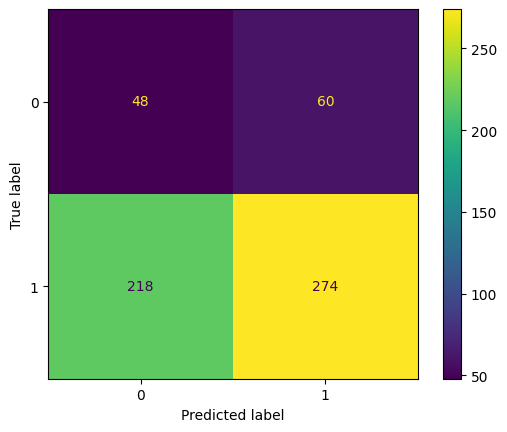

In [98]:
# Choose some features to use for prediction
features = ['Sleep Hours', 'Screen Time per Day (Hours)', 'Work Hours per Week', 'Social Interaction Score'] + categorical_cols
X = df[features]
y = df['has_condition']

# Fix categorical columns to be usable types
categorical_cols = ['Exercise Level', 'Stress Level', 'Diet Type']

# Use pandas get_dummies to convert
X = pd.get_dummies(df[categorical_cols])

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


### Random Forest Model

Model Accuracy: 0.57
              precision    recall  f1-score   support

           0       0.16      0.33      0.22       108
           1       0.81      0.62      0.70       492

    accuracy                           0.57       600
   macro avg       0.49      0.48      0.46       600
weighted avg       0.69      0.57      0.61       600



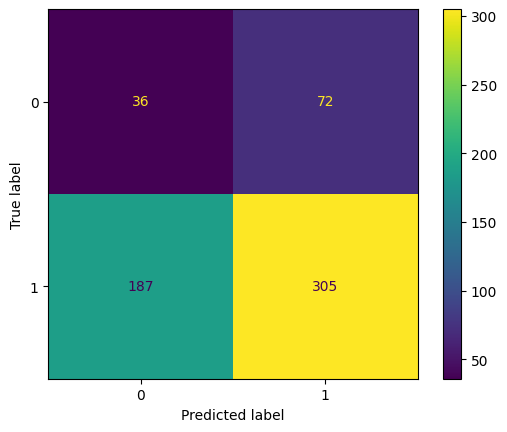

                   Feature  Importance
2  Exercise Level_Moderate    0.160785
5    Stress Level_Moderate    0.112261
1       Exercise Level_Low    0.110117
4         Stress Level_Low    0.106585
8           Diet Type_Keto    0.091837
0      Exercise Level_High    0.080878
7      Diet Type_Junk Food    0.079096
6       Diet Type_Balanced    0.070889
3        Stress Level_High    0.068866
9          Diet Type_Vegan    0.065408


In [94]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Choose some features to use for prediction
features = ['Sleep Hours', 'Screen Time per Day (Hours)', 'Work Hours per Week', 'Social Interaction Score'] + categorical_cols
X = df[features]
y = df['has_condition']

# Fix categorical columns to be usable types
categorical_cols = ['Exercise Level', 'Stress Level', 'Diet Type']

# Use pandas get_dummies to convert
X = pd.get_dummies(df[categorical_cols])

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=10, max_depth=7)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Importance
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df.head(10))

### XGBoost Model

In [91]:
!pip install xgboost

Model Accuracy: 0.535
              precision    recall  f1-score   support

           0       0.17      0.41      0.24       108
           1       0.81      0.56      0.67       492

    accuracy                           0.54       600
   macro avg       0.49      0.49      0.45       600
weighted avg       0.70      0.54      0.59       600

Confusion Matrix:



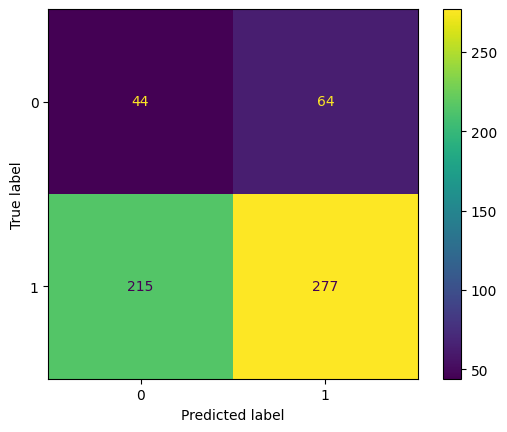

                    Feature  Importance
2   Exercise Level_Moderate    0.194860
5     Stress Level_Moderate    0.149067
10     Diet Type_Vegetarian    0.144836
1        Exercise Level_Low    0.138874
7       Diet Type_Junk Food    0.114980
9           Diet Type_Vegan    0.111127
6        Diet Type_Balanced    0.078517
0       Exercise Level_High    0.035712
3         Stress Level_High    0.032026
4          Stress Level_Low    0.000000


In [96]:
from xgboost import XGBClassifier

# Choose some features to use for prediction
features = ['Sleep Hours', 'Screen Time per Day (Hours)', 'Work Hours per Week', 'Social Interaction Score'] + categorical_cols
X = df[features]
y = df['has_condition']

# Fix categorical columns
categorical_cols = ['Exercise Level', 'Stress Level', 'Diet Type']

# Use pandas get_dummies to convert
X = pd.get_dummies(df[categorical_cols])

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale weight
neg, pos = np.bincount(y_train)
class_weight_ratio = neg / pos

# Train Model
model = XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=class_weight_ratio,
    n_estimators=50,
    max_depth=4,
    learning_rate=0.01,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Importance
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df.head(10))

**Results**

The RandomForest model performed best, with an accuracy score of 0.57, while the other models had similar accuracy scores of 0.54. Interestingly, the Logistic Regression model had the best precision, recall, and f1 scores for predicting the absence of mental health issues, while the RandomForest model had the highest scores for predicting the presence of mental health conditions.

The heavy imbalance of the dataset, with significantly fewer "none" values than mental health condition values, presented a challenge in promoting honesty in the model, and much more accurate, albeit flawed, predictions were made if the model simply guessed "yes" in every instance. In addition, the relatively small sample size was also a heavy limitation.

**Conclusions**

The models were ultimately  successful at predicting the presence of mental health conditions based on lifestyle, but struggled to separate instances with no mental health conditions. The categories of exercise and stress were the most highly valued by the models, potnetially indicating an area worth exploring further. Although basic, this project could be developed into a program that predicts risk of mental health conditions in patients with varying lifestyle factors, similar to cardiovascular risk assessments. Before any further application, however, significant improvements in accuracy must be made. This could be accomplished by inputting larger sample sizes, tweaking splitting ratios, or the use of more advanced models.